## 1. 단순 회귀분석

In [1]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
y = [17, 24, 62, 49, 52, 105, 130, 125]

import numpy as np
A = np.column_stack((X, np.ones((8))))
B = np.array(y)

A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [2]:
np.linalg.inv(A.T @ A) @ A.T @ B

array([  0.87962664, -27.35846347])

In [3]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')
print(f'p_value: {p_value}')
print(f'std_err: {std_err}')

slope: 0.8796266379465087
intercept: -27.3584634715491
r_value: 0.89008928103186
p_value: 0.003051790677096642
std_err: 0.18388671751663876


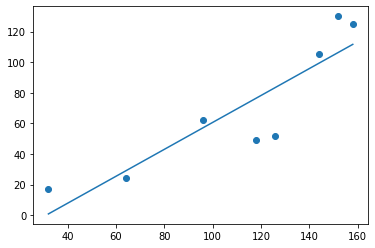

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.show()

In [5]:
fit = np.polyfit(X, y, 1)
fit
# 일차방정식의 경사 및 절편

array([  0.87962664, -27.35846347])

In [6]:
# 도출한 fit을 바탕으로 일차방정식 변환
func = np.poly1d(fit)
func(50)

16.6228684257764

In [7]:
# 이차방정식 생성
fit2 = np.polyfit(X, y, 2)
func2 = np.poly1d(fit2)

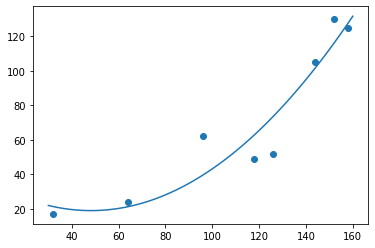

In [8]:
plt.scatter(X, y)
sample_X = np.linspace(30, 160, 100)
plt.plot(sample_X, func2(sample_X), '-')
plt.show()

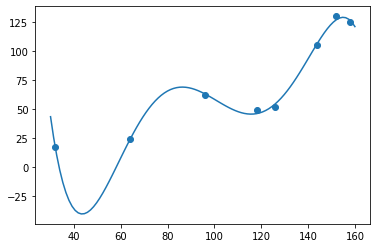

In [9]:
def draw_polyfit(X, y, deg=1):
    fit = np.polyfit(X, y, deg)
    func = np.poly1d(fit)
    plt.scatter(X, y)
    x_sample = np.linspace(30, 160, 100)
    plt.plot(x_sample, func(x_sample))
    plt.show()

draw_polyfit(X, y, 5)

## 2. 포뮬러를 이용한 회귀식

In [10]:
import pandas as pd

df = pd.DataFrame(np.c_[X, y], columns=['X', 'y'])
df

,X,y
0,32,17
1,64,24
2,96,62
3,118,49
4,126,52
5,144,105
6,152,130
7,158,125


In [11]:
# 포뮬러 라이브러리를 이용한 일반 선형회귀식 도출
# 절편, 기울기 도출
from statsmodels.formula.api import ols
model = ols('y ~ X', data=df)
res = model.fit()
res.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [12]:
import statsmodels.api as sm
model = sm.OLS.from_formula('y ~ X', data=df)
res = model.fit()
res.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [13]:
# 상수항을 포함하지 않는 3차방정식의 선형회귀식
model2 = ols('y ~ X + I(X**2) + I(X**3) -1', data=df)
res2 = model2.fit()
res2.params

X            1.005637
I(X ** 2)   -0.013981
I(X ** 3)    0.000082
dtype: float64

In [14]:
pred = res2.predict(df.X)
pred

0     20.546081
1     28.554576
2     40.121998
3     58.503665
4     68.513031
5     99.357248
6    117.343957
7    132.781779
dtype: float64

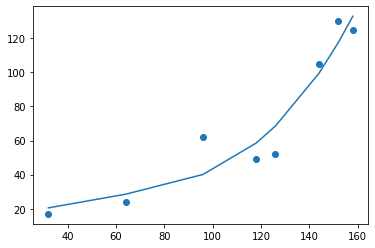

In [15]:
plt.scatter(X, y)
plt.plot(X, pred)
plt.show()

## 3. 정규화 선형회귀

In [16]:
# statsmodels
import numpy as np
n_samples = 30
np.random.seed(0)

X = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1

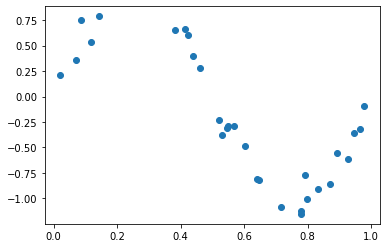

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

In [18]:
import pandas as pd
df = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


In [19]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df)
res = model.fit()
res.params

Intercept    0.713959
x           -1.642204
dtype: float64

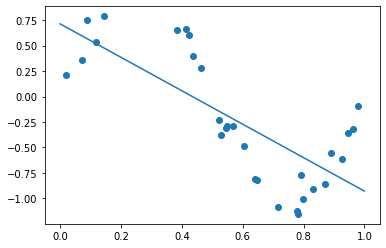

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
xx = np.linspace(0, 1, 1000)
plt.plot(xx, res.predict({'x':xx}))
plt.show()

In [21]:
# 정규화를 하지 않는 회귀모형
from statsmodels.formula.api import ols

model9 = ols('y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)', data=df)
res9 = model9.fit()
res9.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723113
I(x ** 4)   -18340.939657
I(x ** 5)    49326.072526
I(x ** 6)   -78884.743043
I(x ** 7)    74538.645124
I(x ** 8)   -38453.132176
I(x ** 9)     8350.254983
dtype: float64

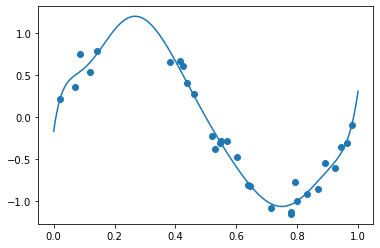

In [22]:
plt.scatter(X, y)
plt.plot(xx, res9.predict({'x':xx}))
plt.show()

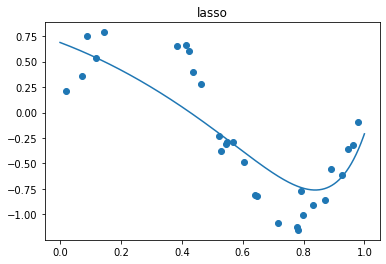

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


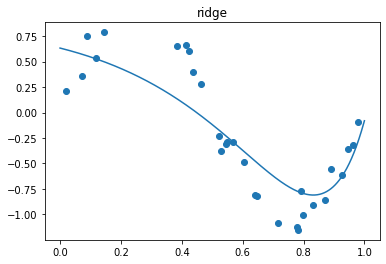

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


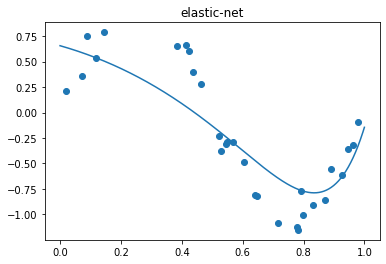

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


In [23]:
# Lasso, Ridge, Elastic Net 회귀모형
L1_wt_dict = {'lasso':1, 'ridge':0, 'elastic-net':0.5}

for name, value in L1_wt_dict.items():
    res9_regularized = model9.fit_regularized(L1_wt=value, alpha=0.01)

    plt.title(name)
    plt.scatter(X, y)
    plt.plot(xx, res9_regularized.predict({'x':xx}))
    plt.show()
    
    print(res9_regularized.params)

In [24]:
# scikit-learn 정규화 회귀모형
# 1. LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [25]:
np.random.seed(0)
n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * x) + np.random.randn(n_samples) * 0.1
x = x[:, np.newaxis]

In [26]:
def plot_model(model):
    plt.scatter(x, y)
    a = np.linspace(0, 1, 1000)
    plt.plot(a, model.predict(a[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141684e+02  3.86672312e+03
 -1.83409397e+04  4.93260726e+04 -7.88847431e+04  7.45386452e+04
 -3.84531322e+04  8.35025499e+03]


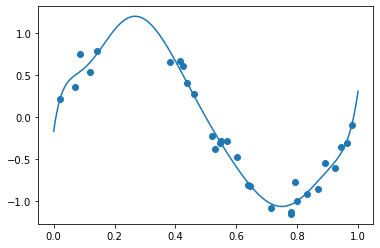

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


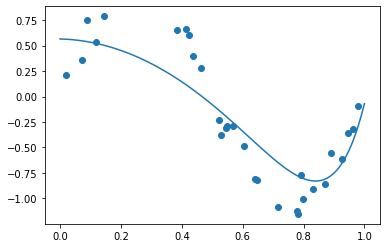

In [28]:
from sklearn.linear_model import Lasso

model = make_pipeline(poly, Lasso(alpha=0.01)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


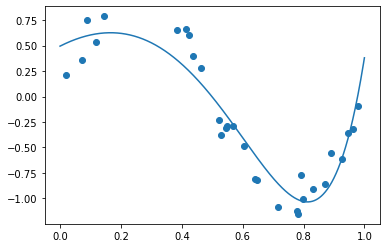

In [29]:
from sklearn.linear_model import Ridge

model = make_pipeline(poly, Ridge(alpha=0.01)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


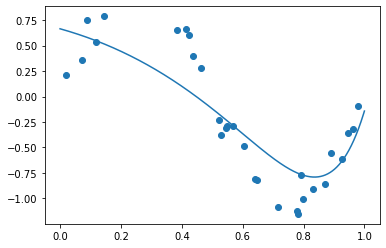

In [30]:
from sklearn.linear_model import ElasticNet

model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [31]:
# ridge와 lasso의 차이
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [32]:
# ridge model 생성
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [33]:
# ridge model 생성
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


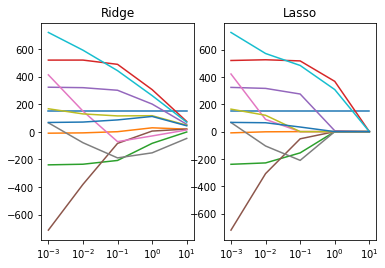

In [34]:
# 두 모형 계수 시각화
import matplotlib.pyplot as plt
%matplotlib inline

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title('Ridge')

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title('Lasso')

plt.show()

## 4. 다중회귀분석

In [35]:
# 다중회귀분석 예
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [36]:
from sklearn.linear_model import LinearRegression

model_boston = LinearRegression()
model_boston.fit(train_X, train_y)

LinearRegression()

In [37]:
model_boston.score(train_X, train_y)

0.7224912856655239

In [39]:
from sklearn.model_selection import cross_val_score

r2 = cross_val_score(model_boston, train_X, train_y, cv=5)
r2

array([0.74514558, 0.69041499, 0.65921423, 0.65352445, 0.56368183])

In [40]:
r2.mean()

0.6623962165346973

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y, model_boston.predict(train_X)))

5.0100207705201605

In [44]:
y_pred = model_boston.predict(test_X)
len(y_pred)

152

In [45]:
rmse_test = math.sqrt(mean_squared_error(test_y, y_pred))
rmse_test

3.94420087885943

In [46]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.7732420592861837

In [47]:
# 다중회귀식의 추정방법
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
import statsmodels.formula.api as smf
formula = 'medv~' + '+'.join(boston_df.iloc[:, :-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        12:21:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
formula2 = "medv ~ rad + zn + rm + chas + age -1"
model_boston2 = smf.ols(formula=formula2, data=boston_df).fit()
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                   5.05e-289
Time:                        12:22:55   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# 회귀분석의 검증 요소들
# 잔차의 정규성
y_pred = model_boston2.predict(boston_df)

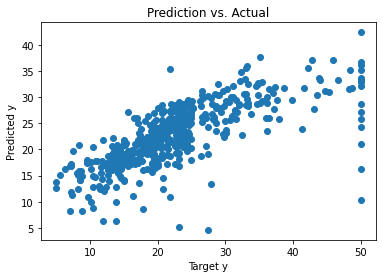

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(boston_df.iloc[:, -1], y_pred)
plt.xlabel('Target y')
plt.ylabel('Predicted y')
plt.title('Prediction vs. Actual')
plt.show()

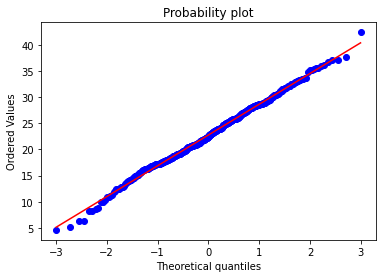

In [54]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(y_pred, plot=plt)
plt.title('Probability plot')
plt.show()

In [56]:
# 이상치 탐색
influence = model_boston2.get_influence()
leverage = influence.hat_matrix_diag
leverage

array([0.00451776, 0.0056484 , 0.0071177 , 0.00849182, 0.00749566,
       0.00492324, 0.00257611, 0.00743155, 0.00978876, 0.00520168,
       0.00665308, 0.0046034 , 0.00344662, 0.00350544, 0.00503083,
       0.00348841, 0.00805384, 0.00464245, 0.00478533, 0.00339064,
       0.00834257, 0.0058364 , 0.00623029, 0.00851624, 0.00688384,
       0.00536983, 0.00614372, 0.00572945, 0.00660802, 0.00552768,
       0.0070933 , 0.00817743, 0.0046783 , 0.00733028, 0.00738016,
       0.00317729, 0.003061  , 0.00504048, 0.00794906, 0.01686875,
       0.01725022, 0.02286547, 0.01720944, 0.01750687, 0.00625739,
       0.00613695, 0.00660426, 0.00575776, 0.00848394, 0.00337546,
       0.00269591, 0.00309051, 0.00792315, 0.00609131, 0.02095916,
       0.02487653, 0.02391795, 0.03478123, 0.00530086, 0.00271819,
       0.00331751, 0.00850954, 0.00310248, 0.00424104, 0.00415371,
       0.01966903, 0.02126082, 0.00689605, 0.00311742, 0.00440053,
       0.01888701, 0.01182293, 0.01622191, 0.01801147, 0.01850

In [58]:
inf_df = influence.summary_frame()
inf_df.head()

,dfb_rad,dfb_zn,dfb_rm,dfb_chas,dfb_age,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.014158,-0.001691,-0.004468,0.004550,-0.005715,0.000086,-0.307386,0.004518,-0.020708,-0.307108,-0.020689
1,0.017086,0.006812,-0.005552,0.005430,-0.007745,0.000116,-0.320005,0.005648,-0.024118,-0.319718,-0.024097
2,-0.037099,-0.048103,0.060999,-0.014854,-0.024080,0.001287,0.947338,0.007118,0.080210,0.947241,0.080201
3,-0.015222,-0.045586,0.062027,-0.009620,-0.039300,0.000904,0.726654,0.008492,0.067248,0.726311,0.067216
4,-0.032230,-0.065823,0.086878,-0.016786,-0.047057,0.002031,1.159507,0.007496,0.100766,1.159907,0.100800


In [59]:
inf_df.standard_resid # 표준화된 잔차

0     -0.307386
1     -0.320005
2      0.947338
3      0.726654
4      1.159507
         ...   
501   -0.477882
502   -0.315476
503   -0.254717
504   -0.439040
505   -1.562010
Name: standard_resid, Length: 506, dtype: float64

In [61]:
(c, p) = influence.cooks_distance # 쿡 거리 및 p-value
c

array([8.57607218e-05, 1.16340057e-04, 1.28671302e-03, 9.04461053e-04,
       2.03074066e-03, 3.20792224e-04, 5.67084951e-06, 1.53316849e-03,
       8.06015504e-05, 7.99053018e-05, 1.50540054e-03, 9.30962551e-05,
       7.73122191e-05, 6.42436150e-05, 2.27397248e-04, 9.13111243e-05,
       1.20787174e-04, 2.72086373e-04, 7.62564440e-05, 1.01882798e-04,
       6.84812609e-04, 1.16522693e-05, 9.92016113e-04, 7.33173025e-04,
       5.60313227e-04, 6.32521615e-04, 2.43436937e-04, 9.70422809e-04,
       5.04452776e-04, 2.04206419e-04, 1.24736062e-03, 1.17782861e-03,
       1.30976990e-03, 1.07118836e-03, 1.66442093e-03, 1.07989001e-04,
       4.01384621e-05, 1.26142781e-04, 1.04717429e-09, 5.79819826e-05,
       5.12350479e-04, 2.35970568e-03, 6.15615562e-04, 1.06419494e-03,
       4.10539701e-04, 5.36667856e-04, 5.32494389e-04, 5.64456398e-04,
       3.53916958e-04, 3.70382167e-05, 2.45913006e-04, 1.24019449e-04,
       4.94540442e-04, 2.19501208e-04, 3.46156347e-03, 8.23743286e-04,
      

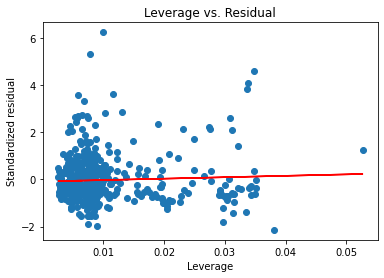

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression

plt.scatter(influence.hat_matrix_diag, inf_df.standard_resid)

fit = np.polyfit(influence.hat_matrix_diag, inf_df.standard_resid, 1)
fit_fn = np.poly1d(fit)
plt.plot(influence.hat_matrix_diag, fit_fn(influence.hat_matrix_diag), 'r')

plt.xlabel('Leverage')
plt.ylabel('Standardized residual')
plt.title('Leverage vs. Residual')
plt.show()

In [63]:
# 다중공선성
# check VIF
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = Boston.data

In [64]:
formula = 'medv~' + '+'.join(boston_df.columns[:-1])

from patsy import dmatrices

y, X = dmatrices(formula, boston_df, return_type='dataframe')

In [65]:
import pandas as pd
vif = pd.DataFrame()

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,585.265238,Intercept
10,9.008554,tax
9,7.484496,rad
5,4.393720,nox
3,3.991596,indus
8,3.955945,dis
7,3.100826,age
13,2.941491,lstat
2,2.298758,zn
6,1.933744,rm


In [67]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")

    import pandas as pd
    vif = pd.DataFrame()

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False, inplace=True)
    
    return vif

In [68]:
feature_cols = list(boston_df.columns[:-1])
while True:
    formula = 'medv~' + '+'.join(feature_cols) + '-1'
    vif = get_vif(formula, boston_df)
    if vif.iloc[0, 0] > 10:
        feature_cols.remove(vif.iloc[0, 1])
    else:
        break

vif

,VIF Factor,features
2,6.900077,indus
6,6.726973,lstat
5,4.678181,rad
4,3.968908,dis
1,2.299351,zn
0,2.067135,crim
3,1.086574,chas


## 5. 회귀모형 성능평가

In [70]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [71]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [72]:
lasso = linear_model.Lasso()
model = lasso.fit(train_X, train_y)
model

Lasso()

In [73]:
pred = model.predict(test_X)
pred[:10]

array([161.35677448, 139.87745539, 130.2351721 , 142.87904817,
       143.43453123, 186.09061643, 164.07809371, 202.88797923,
       112.49407588, 172.47810123])

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred)

3395.145022149491

In [78]:
import math
rmse = math.sqrt(mean_squared_error(test_y, pred))
rmse

58.26787298460011

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred)

48.71376874620696

In [80]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_y, pred)

0.3737698138762475

In [81]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.3670362034718291